# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Trends based on the data

- The only strong inference that can be made from the data is that the closer we are from the latitude zero the higher the temperature is going to be.
- A weaker trend is that wind speed decreases as long as we approach to the latitude zero.
- Another trend that was seen is that humidity and cloudiness decrease toward south pole.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [69]:
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)

def build_scatter_plot(df, colx, coly, title, xlabel, ylabel, file):
    # Build a scatter plot
    plt.scatter(df[colx], df[coly], marker="o")
    # Incorporate the other graph properties
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(True)
    # Save the figure
    plt.savefig(file)
    # Show plot
    plt.show()
    
def build_linear_regression(df, colx, coly, title, xlabel, ylabel, file, le_x, le_y, r_x, r_y):
    # Perform a linear regression on coly vs. colx
    x_values = df[colx]
    y_values = df[coly]
    # Calculate the line equation using linear regression function
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot original data using Scatter type
    plt.scatter(x_values,y_values, label='original data')
    # Plot fitted line using Line type
    plt.plot(x_values,regress_values,"r-", label='fitted line')
    # Add line equation to plot
    plt.annotate(line_eq,(le_x,le_y),fontsize=15,color="red")
    # Set title, xlabel, ylabel and legend
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    # Show r-squared value
    r2_latex = r'$r^2 = $'
    r2_value = f'{r2_latex}{round(rvalue**2,4)}'
    plt.annotate(r2_value,(r_x,r_y),fontsize=15,color="green")
    print(f"The r-value is: {rvalue}")
    # Save the figure
    plt.savefig(file)
    # Show plot
    plt.show()

In [26]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

today = date.today().strftime("%m/%d/%Y")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

658

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Save config information.
base_url = "http://api.openweathermap.org/"
endpoint = "data/2.5/weather?"
units = "imperial"
url = base_url + endpoint

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [33]:
# set up lists to hold reponse info
checked_cities = []
latitudes = []
longitudes = []
max_temperatures = []
humidities = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

In [34]:
# Loop through the list of cities and perform a request for data on each
rec = 0
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    rec += 1
    time.sleep(1.05)
    response = requests.get(query_url + city).json()
    if response['cod'] == '404':
        print("City not found. Skipping...")
    elif int(response['cod']) >= 400:
        print("Error. Skipping...")
    else:
        print(f"Processing Record {rec} of {len(cities)} | {response['name']}")
        checked_cities.append(response['name'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temperatures.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])     

# create a data frame from previuos values
weather_dict = {
    "City": checked_cities,
    "Lat": latitudes,
    "Lng": longitudes,
    "Max Temp": max_temperatures,
    "Humidity": humidities,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
}

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
weather_data_df = pd.DataFrame(weather_dict)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 658 | Mattru
Processing Record 2 of 658 | Hobart
Processing Record 3 of 658 | Hermanus
Processing Record 4 of 658 | Atuona
Processing Record 5 of 658 | Klaksvík
Processing Record 6 of 658 | Tashtyp
Processing Record 7 of 658 | Coruripe
Processing Record 8 of 658 | Saint Paul Harbor
Processing Record 9 of 658 | Rikitea
Processing Record 10 of 658 | Dobryanka
Processing Record 11 of 658 | Taksimo
Processing Record 12 of 658 | Goderich
Processing Record 13 of 658 | Saint-Louis
City not found. Skipping...
Processing Record 15 of 658 | Roald
Processing Record 16 of 658 | Cape Town
Processing Record 17 of 658 | Porosozero
Processing Record 18 of 658 | Tandur
Processing Record 19 of 658 | Qaanaaq
City not found. Skipping...
Processing Record 21 of 658 | Iranshahr
Processing Record 22 of 658 | Kasongo-Lunda
Processing Record 23 of 658 | Mahébourg
Processing Record 24 of 658 | Hilo
Processing Record 25 of 658 | Kounda

Processing Record 211 of 658 | Upernavik
Processing Record 212 of 658 | Faanui
Processing Record 213 of 658 | Havre-St-Pierre
Processing Record 214 of 658 | Bredasdorp
Processing Record 215 of 658 | Narathiwat
City not found. Skipping...
Processing Record 217 of 658 | Lorengau
Processing Record 218 of 658 | Konya Province
Processing Record 219 of 658 | Vila Franca do Campo
Processing Record 220 of 658 | Aklavik
Processing Record 221 of 658 | Çermik
Processing Record 222 of 658 | Meulaboh
Processing Record 223 of 658 | Celestún
City not found. Skipping...
Processing Record 225 of 658 | Meadow Lake
Processing Record 226 of 658 | Nadym
Processing Record 227 of 658 | San Quintín
Processing Record 228 of 658 | Alta Floresta
City not found. Skipping...
City not found. Skipping...
Processing Record 231 of 658 | Chamonix
City not found. Skipping...
Processing Record 233 of 658 | Khatanga
Processing Record 234 of 658 | Kérouané
Processing Record 235 of 658 | Katsuura
Processing Record 236 of 65

Processing Record 419 of 658 | Aktobe
Processing Record 420 of 658 | Kirkwall
Processing Record 421 of 658 | Wajima
Processing Record 422 of 658 | Dingle
Processing Record 423 of 658 | Carnarvon
Processing Record 424 of 658 | Flinders
Processing Record 425 of 658 | Hervey Bay
Processing Record 426 of 658 | Belyy Yar
Processing Record 427 of 658 | Manzanillo
Processing Record 428 of 658 | Iralaya
Processing Record 429 of 658 | Faya
City not found. Skipping...
Processing Record 431 of 658 | Buraidah
Processing Record 432 of 658 | Grand Gaube
Processing Record 433 of 658 | Verkhnyaya Inta
Processing Record 434 of 658 | Eirunepé
Processing Record 435 of 658 | Morant Bay
Processing Record 436 of 658 | Arman'
Processing Record 437 of 658 | Ranot
Processing Record 438 of 658 | Nānākuli
Processing Record 439 of 658 | Kubuta
City not found. Skipping...
City not found. Skipping...
Processing Record 442 of 658 | Newcastle
Processing Record 443 of 658 | Ixtapa
Processing Record 444 of 658 | Ambilo

Processing Record 626 of 658 | Lufilufi
Processing Record 627 of 658 | Jizan
Processing Record 628 of 658 | Caniço
Processing Record 629 of 658 | Kilindoni
Processing Record 630 of 658 | Surat
Processing Record 631 of 658 | Taku
Processing Record 632 of 658 | Beijing
Processing Record 633 of 658 | Vao
Processing Record 634 of 658 | Sheksna
Processing Record 635 of 658 | Whyalla
Processing Record 636 of 658 | Lovozero
Processing Record 637 of 658 | Medicine Hat
Processing Record 638 of 658 | Dinguiraye
Processing Record 639 of 658 | Beni
Processing Record 640 of 658 | Dunedin
Processing Record 641 of 658 | Remanso
Processing Record 642 of 658 | Esil
Processing Record 643 of 658 | Inongo
Processing Record 644 of 658 | Valentín Gómez Farías
Processing Record 645 of 658 | Husavik
Processing Record 646 of 658 | San Carlos
Processing Record 647 of 658 | Egvekinot
Processing Record 648 of 658 | Carutapera
Processing Record 649 of 658 | Linxia Chengguanzhen
Processing Record 650 of 658 | Rome


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Export file as a CSV
weather_data_df.to_csv(output_data_file, index=False, header=True)

In [36]:
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mattru,7.6244,-11.8332,73.42,85,54,2.84,SL,1612581797
1,Hobart,-42.8794,147.3294,78.80,41,40,18.41,AU,1612581712
2,Hermanus,-34.4187,19.2345,59.00,92,4,4.63,ZA,1612581536
3,Atuona,-9.8000,-139.0333,79.57,81,74,18.79,PF,1612581564
4,Klaksvík,62.2266,-6.5890,35.60,69,75,12.66,FO,1612581221


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
#  Get the indices of cities that have humidity over 100%.
humidity_threshold = 100
over100 = weather_data_df.loc[weather_data_df['Humidity'] > humidity_threshold].reset_index()['index'].tolist()
over100

[]

In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(over100)>0:
    clean_city_data = weather_data_df.drop(over100, inplace=False)
else:
    clean_city_data = weather_data_df.copy()
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mattru,7.6244,-11.8332,73.42,85,54,2.84,SL,1612581797
1,Hobart,-42.8794,147.3294,78.80,41,40,18.41,AU,1612581712
2,Hermanus,-34.4187,19.2345,59.00,92,4,4.63,ZA,1612581536
3,Atuona,-9.8000,-139.0333,79.57,81,74,18.79,PF,1612581564
4,Klaksvík,62.2266,-6.5890,35.60,69,75,12.66,FO,1612581221


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

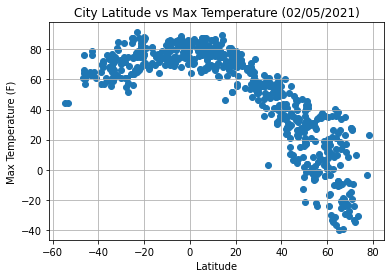

In [70]:
build_scatter_plot(clean_city_data, "Lat", "Max Temp", f"City Latitude vs Max Temperature ({today})", 
                   "Latitude", "Max Temperature (F)", "../output_data/MaxTemperatureInCities.png")

Here it can be noticed that as the cities approach to the equator at latitude zero, the temperature rises.

## Latitude vs. Humidity Plot

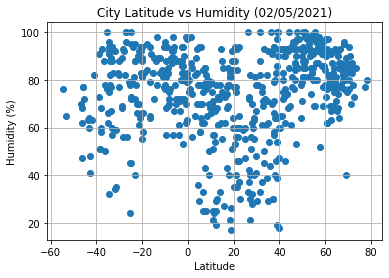

In [40]:
build_scatter_plot(clean_city_data, "Lat", "Humidity", f"City Latitude vs Humidity ({today})", 
                   "Latitude", "Humidity (%)", "../output_data/HumidityInCities.png")

In this case, a clear pattern of humidity is not noticeable. Maybe it drops a little around latitude 20, at the level of the Caribbean Sea.

## Latitude vs. Cloudiness Plot

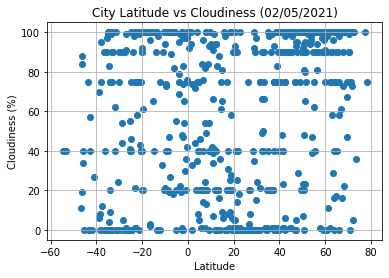

In [41]:
build_scatter_plot(clean_city_data, "Lat", "Cloudiness", f"City Latitude vs Cloudiness ({today})", 
                   "Latitude", "Cloudiness (%)", "../output_data/CloudinessInCities.png")

In this cloudiness graph, the data is totally spread out with no pattern. It seems to have nothing to do with latitude.

## Latitude vs. Wind Speed Plot

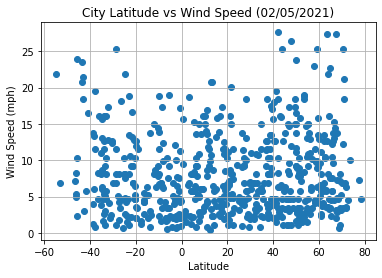

In [42]:
build_scatter_plot(clean_city_data, "Lat", "Wind Speed", f"City Latitude vs Wind Speed ({today})", 
                   "Latitude", "Wind Speed (mph)", "../output_data/WindSpeedInCities.png")

Here we can see a uniform pattern of low wind speeds in a wide band around the equator with some outliers over 20 mph.

## Linear Regression

In [43]:
# Northern Hemisphere
hemisphere_threshold = 0
north_hem = clean_city_data.loc[clean_city_data['Lat'] >= hemisphere_threshold]
north_hem['Lat']

0       7.6244
4      62.2266
5      52.7939
7      57.7900
9      58.4619
        ...   
601    25.0213
602    65.2820
603    44.7749
606    54.8167
607    63.0500
Name: Lat, Length: 417, dtype: float64

In [44]:
# Southern Hemisphere
south_hem = clean_city_data.loc[clean_city_data['Lat'] < hemisphere_threshold]
south_hem['Lat']

1     -42.8794
2     -34.4187
3      -9.8000
6     -10.1256
8     -23.1203
        ...   
593    -1.9500
598    -1.1950
604    -2.0833
605   -34.5703
608   -15.1961
Name: Lat, Length: 192, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8854357868563709


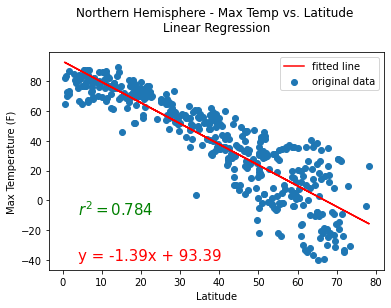

In [71]:
build_linear_regression(north_hem, "Lat", "Max Temp",
                        "Northern Hemisphere - Max Temp vs. Latitude \nLinear Regression\n",
                        "Latitude", "Max Temperature (F)", "../output_data/NH_MT_vs_L_LinearRegression.png",
                        4,-40,4,-10)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5831756951126643


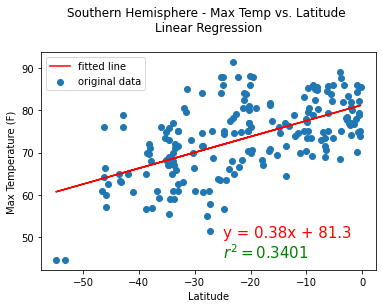

In [72]:
build_linear_regression(south_hem, "Lat", "Max Temp",
                        "Southern Hemisphere - Max Temp vs. Latitude \nLinear Regression\n",
                        "Latitude", "Max Temperature (F)", "../output_data/SH_MT_vs_L_LinearRegression.png",
                        -25,50,-25,45)

Maximum temperature gets higher as we approach to the equator. However, the correlation is stronger in the north hemisphere for this dataset.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.40862229477942336


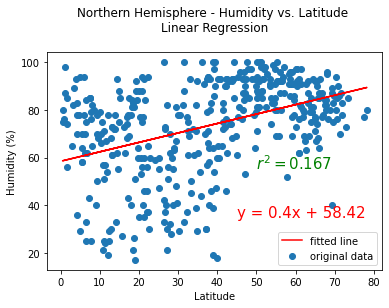

In [73]:
build_linear_regression(north_hem, "Lat", "Humidity",
                        "Northern Hemisphere - Humidity vs. Latitude \nLinear Regression\n",
                        "Latitude", "Humidity (%)", "../output_data/NH_H_vs_L_LinearRegression.png",
                        45,35,50,55)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22321663756386295


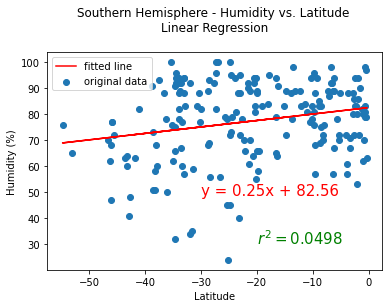

In [74]:
build_linear_regression(south_hem, "Lat", "Humidity",
                        "Southern Hemisphere - Humidity vs. Latitude \nLinear Regression\n",
                        "Latitude", "Humidity (%)", "../output_data/SH_H_vs_L_LinearRegression.png",
                        -30,49,-20,30)

The trend is heading downward as we head to the south pole. But the correlation is not strong enough to conclude that.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3774026256884425


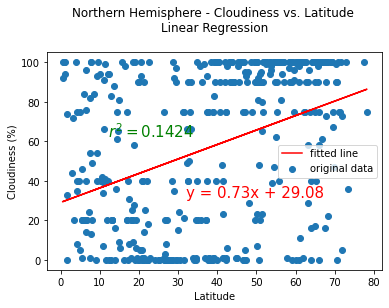

In [75]:
build_linear_regression(north_hem, "Lat", "Cloudiness",
                        "Northern Hemisphere - Cloudiness vs. Latitude \nLinear Regression\n",
                        "Latitude", "Cloudiness (%)", "../output_data/NH_C_vs_L_LinearRegression.png",
                        32,32,12,62)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23980465689907637


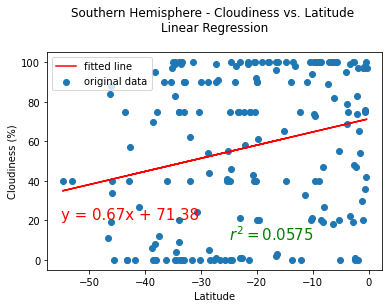

In [76]:
build_linear_regression(south_hem, "Lat", "Cloudiness",
                        "Southern Hemisphere - Cloudiness vs. Latitude \nLinear Regression\n",
                        "Latitude", "Cloudiness (%)", "../output_data/SH_C_vs_L_LinearRegression.png",
                        -55,20.5,-25,10)

Similar to the previous chart, there is a slight trend to increase cloudiness as long as we go up to the north pole. However, correlation is still too low for a conclusion.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1107354105088309


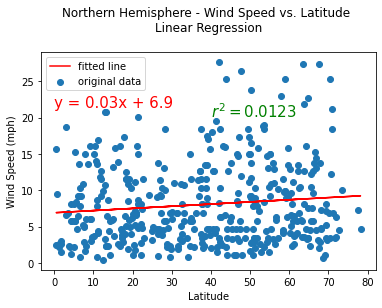

In [77]:
build_linear_regression(north_hem, "Lat", "Wind Speed",
                        "Northern Hemisphere - Wind Speed vs. Latitude \nLinear Regression\n",
                        "Latitude", "Wind Speed (mph)", "../output_data/NH_WS_vs_L_LinearRegression.png",
                        0,21.5,40,20)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3002593666713614


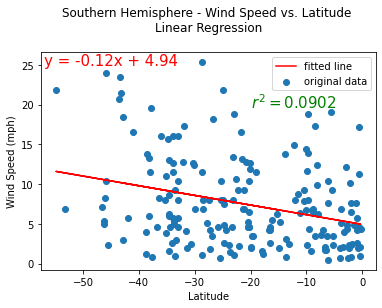

In [78]:
build_linear_regression(south_hem, "Lat", "Wind Speed",
                        "Southern Hemisphere - Wind Speed vs. Latitude \nLinear Regression\n",
                        "Latitude", "Wind Speed (mph)", "../output_data/SH_WS_vs_L_LinearRegression.png",
                        -57,25,-20,19.5)

Just like the general scatter plot suggests, the wind speed in the world seems to decrease as it approaches to the equator. Again, the low pearson correlation does not guarantee that.